In [1]:
import pandas as pd
data=pd.read_csv(r"C:\Users\HP\Downloads\mobile_price.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

[1.  1.7 2.4 3.1 3.8 4.5 5.2 5.9 6.6 7.3 8. ]


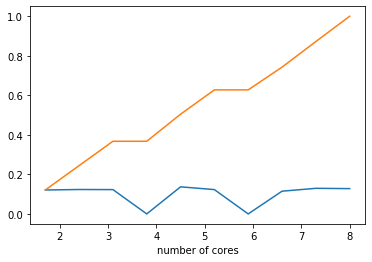

In [22]:
# UNIVARIATE ANALYSIS

import matplotlib.pyplot as plt
import numpy as np
counts,bin_edges=np.histogram(data['n_cores'],bins=10,density=True)
print(bin_edges)
plt.xlabel('number of cores')
pdf=counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)

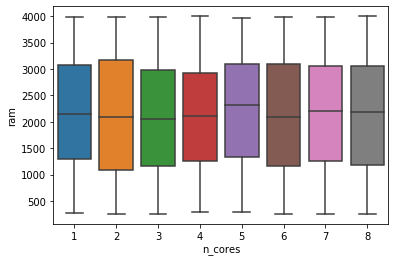

In [26]:
# BIVARIATE ANALYSIS

import seaborn as sns
sns.boxplot(x='n_cores',y='ram',data=data)
plt.show()

In [27]:
# APPLYING NAIVE BAYES

x=data.drop(['price_range'],axis=1)
y=data['price_range']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=15)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
predicted= model.predict(X_test) 

from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(predicted,y_test))
print(confusion_matrix(predicted,y_test))

0.83
[[90  6  0  0]
 [ 2 79 13  0]
 [ 1 22 70 17]
 [ 0  0  7 93]]
